In [33]:
import numpy as np
from astropy.table import QTable, Table, Column
t= Table.read("/home/sumit/Desktop/WD Project/mos_gaia_dr2_wd.fits", format="fits")
t



wd,dr2name,source_id,source,ra,e_ra,dec,e_dec,plx,e_plx,pmra,e_pmra,pmdec,e_pmdec,epsi,amax,fg_gaia,e_fg_gaia,g_gaia_mag,fbp,e_fbp,bpmag,frp,e_frp,rpmag,e_br_rp,glon,glat,density,ag,sdss,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,zmag,e_zmag,pwd,f_pwd,teffh,e_teffh,loggh,e_loggh,massh,e_massh,chi2h,teffhe,e_teffhe,logghe,e_logghe,masshe,e_masshe,chisqhe
bytes23,bytes28,int64,int32,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,bytes19,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
WDJ025854.43+003040.34,Gaia DR2 74698071455360,74698071455360,243328,44.72646901556998,0.28567386112959603,0.5112707464812695,0.25599366159026676,14.50074,0.3657973,-78.52656079709863,0.5427489490094788,15.012084874836075,0.5470492489368379,0.0,0.5372557,534.38245,1.808201,18.868734,312.15863,18.408854,19.11545,362.21515,11.172177,18.364504,1.2619685,176.11511398045826,-48.74189973283115,2772.1445,0.17931461,J025854.44+003040.3,19.962,0.033,19.174,0.01,18.833,0.01,18.694,0.013,18.661,0.04,0.988624,0,5912.965,303.26047,8.372084,0.167457,0.827522,0.111186,1.319487,5759.198,311.5228,8.282587,0.185514,0.752814,0.123687,1.221527
WDJ030342.24+005310.43,Gaia DR2 152935195517952,152935195517952,41984,45.92584768471102,0.18368731112639675,0.8861145695998326,0.2010294471025037,4.671757,0.33319572,-30.908062217688194,0.3572135974662655,-26.73967510017829,0.34644328777017175,0.27127564,0.43184733,1177.987,2.9259744,18.010515,878.02954,9.245146,17.992615,489.7344,7.634973,18.037018,1.1611027,176.96708518810607,-47.62112094935022,2448.3142,0.18661743,J030342.22+005310.3,18.287,0.015,17.879,0.006,18.117,0.007,18.35,0.011,18.611,0.039,0.999324,0,13259.833,649.629,7.786484,0.154615,0.493008,0.069604,0.007033,12730.786,538.4719,7.745324,0.14715,0.473115,0.049265,10.165591
WDJ030344.01+013535.16,Gaia DR2 262680200430208,262680200430208,606848,45.93331759541777,0.3138628128423388,1.5929702744130014,0.36468165336485614,6.495403,0.41979772,-13.854503800930587,0.6890392571390287,-30.273132105738306,0.7153254897822505,0.5518591,0.7335058,272.8221,1.1564398,19.598667,193.12788,10.673004,19.636776,152.07256,8.272819,19.306793,1.2652949,176.22628782356864,-47.12311117707965,3709.4175,0.19922957,J030344.00+013534.8,20.046,0.051,19.68,0.014,19.567,0.019,19.661,0.026,19.644,0.07,0.995937,0,8281.609,1067.137,8.477053,0.345407,0.901866,0.215614,2.114426,8171.034,1011.76447,8.435442,0.347081,0.859042,0.222191,1.957661
WDJ025709.00+004627.95,Gaia DR2 288175125714560,288175125714560,22144,44.28743100663697,0.16060624493570758,0.7743488847665643,0.12051266411169455,6.4437113,0.1741326,-18.312461787365933,0.316156734859026,-18.769005044323325,0.22360292616773153,0.06492882,0.30022407,1887.3164,4.556691,17.498755,1414.818,15.860915,17.474636,787.3212,12.67905,17.52154,1.1668098,175.3618545492405,-48.867639255550394,2520.2168,0.16459899,J025708.99+004627.8,17.821,0.012,17.36,0.005,17.569,0.006,17.794,0.008,17.985,0.023,0.999549,0,13046.988,710.4043,7.924339,0.096566,0.565066,0.053551,0.001597,12499.292,537.5434,7.830668,0.09858,0.491814,0.040766,8.662606
WDJ025740.28+005103.15,Gaia DR2 294840915182080,294840915182080,246272,44.41790800241273,0.6484183803129502,0.8508829517790394,0.6372487751682246,1.1403648,0.8189146,12.780960276768937,1.4102578832682688,1.801312799272769,1.3897260708886328,2.134629,1.3901014,188.7796,1.5638692,19.998478,148.36467,7.9372025,19.923061,91.365845,11.787677,19.85996,1.2698964,175.42016513237192,-48.721342485140326,3024.3882,0.17317156,J025740.28+005103.1,19.91,0.036,19.783,0.014,20.095,0.021,20.302,0.036,20.639,0.169,0.849513,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WDJ025746.40+010106.05,Gaia DR2 298895364329216,2988953643

In [34]:
logg= t["loggh"]
print(np.mean(t["teffh"]))


10213.207


In [56]:
import WDPhotTools

Attributes = dir(WDPhotTools.theoretical_lf.WDLF.set_sfr_model.__format__
                )
print(wdlf.sfr_mode_list)

['constant', 'burst', 'decay', 'manual']


# Generating WDLF 

In [2]:
import WDPhotTools
import numpy as np
from WDPhotTools import theoretical_lf

Mag = np.arange(0.1, 20.0, 0.1)

wdlf = theoretical_lf.WDLF()

# Set the cooling models
wdlf.set_low_mass_cooling_model('montreal_co_da_20')
wdlf.set_intermediate_mass_cooling_model('montreal_co_da_20')
wdlf.set_high_mass_cooling_model('montreal_co_da_20')

# Construct the interpolator
wdlf.compute_cooling_age_interpolator()

# Set the initial mass function to Kroupa 2001
wdlf.set_imf_model("C03b")

# Use the PARSEC stellar evolution model with a metallicity of z=0.014
wdlf.set_ms_model('PARSECz0017')

# Use the Catalan et al. 2008 IFMR
wdlf.set_ifmr_model("S09")

# Constant SFR since 10 Gyr ago
wdlf.set_sfr_model(mode="constant", age=1e10)

# Compute the WDLF
mag, constant_density = wdlf.compute_density(mag=Mag)

#wdlf.plot_wdlf(
    #display=True,
    #folder=".",
    #ext=["png", "pdf"],
    #savefig=False,
#)


/home/sumit/.local/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2132: RuntimeWarning: invalid value encountered in double_scalars
  q = (xf - fulc) * (fx - fnfc)
/home/sumit/.local/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2133: RuntimeWarning: invalid value encountered in double_scalars
  p = (xf - fulc) * q - (xf - nfc) * r
/home/sumit/.local/lib/python3.8/site-packages/scipy/optimize/_optimize.py:2134: RuntimeWarning: invalid value encountered in double_scalars
  q = 2.0 * (q - r)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
print(mag)
print(len(constant_density))
print(np.log10(constant_density))


[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8
  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.
  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8
  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2
 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6
 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.
 14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4
 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8
 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2
 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6
 19.7 19

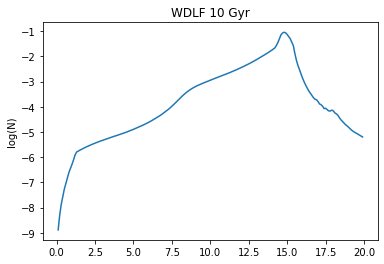

In [4]:
import matplotlib.pyplot as plt

plt.plot(mag,np.log10(constant_density))
plt.title("WDLF 10 Gyr")
plt.ylabel("log(N)")
#plt.xlabel("Mbol/mag")
plt.show()

# Luminosity to Teff.

In [19]:
from WDPhotTools.atmosphere_model_reader import AtmosphereModelReader

teff=[]
atm = AtmosphereModelReader()
interpolator = atm.interp_am(dependent="Teff", independent=["logg", "Mbol"])
for i in range(len(mag)):
    teff= np.append(teff,interpolator(8.0, mag[i]))
    
print(teff)
#print(interpolator(8.0, mag[i]))

[136596.34069258 133669.80219777 130815.40284821 128025.53361912
 125295.22893561 122621.15459441 120000.         117429.1008577
 114908.72478006 112439.95903236 110023.89087991 107661.04496947
 105349.76370137 103087.86251609 100873.15685699  98703.50346696
  96577.50927372  94494.42632334  92453.52716265  90454.08433846
  88495.50689449  86578.15683354  84702.79224722  82869.32174576
  81075.63669808  79319.35226541  77598.71043645  75912.78121557
  74260.71838534  72642.28478568  71057.83026972  69507.71828194
  67991.72918794  66508.70659414  65057.40954287  63636.66741485
  62245.62498651  60883.51539606  59549.57233647  58243.25311521
  56964.46623649  55713.17083749  54489.31649006  53292.49929241
  52121.86695758  50976.53832741  49855.63261133  48758.42504286
  47684.58357565  46633.83659393  45605.91248192  44600.53665178
  43617.2887971   42655.54185782  41714.6531999   40793.98018929
  39892.87979095  39010.75514528  38147.27324716  37302.17173689
  36475.18825477  35666.06

# Random selection of the Teff

In [6]:
import random
from random import choices
import numpy as np
import matplotlib.pyplot as plt

ws= choices(np.linspace(136596.34069258, 1575.16362143,199), constant_density, k=10**5 )
print(len(ws))
#len(ws)

#plt.plot(np.linspace(0.1,19.9,10**5), ws)

#type(ws)


100000


In [38]:
print(np.min(ws), len(ws))

type(ws)

ws.write("/home/sumit/Desktop/WD Project/est.fits")

14.331988999999998 100000


AttributeError: 'list' object has no attribute 'write'

In [41]:
#from astropy.io import fits
#tbhdu = fits.BinTableHDU.from_columns(
#     [fits.Column(name='luminosity', format='E', array=np.array(ws2))])
 #   
#tbhdu.writeto('/home/sumit/Desktop/WD Project/est.fits', overwrite=True)